# Energy production, trade and consumption

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Production, Trade and Supply of Energy.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source,Unnamed: 7
0,1,"Total, all countries or areas",1995,Primary energy production (petajoules),382594,NaN,"United Nations Statistics Division, New York, ...",NaN
1,1,"Total, all countries or areas",2000,Primary energy production (petajoules),413334,NaN,"United Nations Statistics Division, New York, ...",NaN
2,1,"Total, all countries or areas",2005,Primary energy production (petajoules),477637,NaN,"United Nations Statistics Division, New York, ...",NaN
3,1,"Total, all countries or areas",2010,Primary energy production (petajoules),531540,NaN,"United Nations Statistics Division, New York, ...",NaN
4,1,"Total, all countries or areas",2015,Primary energy production (petajoules),570407,NaN,"United Nations Statistics Division, New York, ...",NaN
...,...,...,...,...,...,...,...,...
8405,716,Zimbabwe,2010,Supply per capita (gigajoules),31,NaN,"United Nations Statistics Division, New York, ...",NaN
8406,716,Zimbabwe,2015,Supply per capita (gigajoules),34,NaN,"United Nations Statistics Division, New York, ...",NaN
8407,716,Zimbabwe,2016,Supply per capita (gigajoules),33,NaN,"United Nations Statistics Division, New York, ...",NaN
8408,716,Zimbabwe,2017,Supply per capita (gigajoules),33,NaN,"United Nations Statistics Division, New York, ...",NaN


In [5]:
df.shape

(8410, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410 entries, 0 to 8409
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Region/Country/Area  8410 non-null   int64 
 1   Unnamed: 1           8410 non-null   object
 2   Year                 8410 non-null   int64 
 3   Series               8410 non-null   object
 4   Value                8410 non-null   int64 
 5   Footnotes            2326 non-null   object
 6   Source               8410 non-null   object
 7   Unnamed: 7           28 non-null     object
dtypes: int64(3), object(5)
memory usage: 525.8+ KB


In [7]:
df.rename(columns={'Region/Country/Area': 'Code', 
                   'Unnamed: 1': 'Region/Country/Area',
                   }, inplace=True)

df.head()

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source,Unnamed: 7
0,1,"Total, all countries or areas",1995,Primary energy production (petajoules),382594,NaN,"United Nations Statistics Division, New York, ...",NaN
1,1,"Total, all countries or areas",2000,Primary energy production (petajoules),413334,NaN,"United Nations Statistics Division, New York, ...",NaN
2,1,"Total, all countries or areas",2005,Primary energy production (petajoules),477637,NaN,"United Nations Statistics Division, New York, ...",NaN
3,1,"Total, all countries or areas",2010,Primary energy production (petajoules),531540,NaN,"United Nations Statistics Division, New York, ...",NaN
4,1,"Total, all countries or areas",2015,Primary energy production (petajoules),570407,NaN,"United Nations Statistics Division, New York, ...",NaN


In [8]:
df1 = df[['Code', 'Region/Country/Area', 'Year', 'Series', 'Value']]
df1

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",1995,Primary energy production (petajoules),382594
1,1,"Total, all countries or areas",2000,Primary energy production (petajoules),413334
2,1,"Total, all countries or areas",2005,Primary energy production (petajoules),477637
3,1,"Total, all countries or areas",2010,Primary energy production (petajoules),531540
4,1,"Total, all countries or areas",2015,Primary energy production (petajoules),570407
...,...,...,...,...,...
8405,716,Zimbabwe,2010,Supply per capita (gigajoules),31
8406,716,Zimbabwe,2015,Supply per capita (gigajoules),34
8407,716,Zimbabwe,2016,Supply per capita (gigajoules),33
8408,716,Zimbabwe,2017,Supply per capita (gigajoules),33


In [9]:
df1.shape

(8410, 5)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410 entries, 0 to 8409
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Code                 8410 non-null   int64 
 1   Region/Country/Area  8410 non-null   object
 2   Year                 8410 non-null   int64 
 3   Series               8410 non-null   object
 4   Value                8410 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 328.6+ KB


In [11]:
df1.describe(include='object')

,Region/Country/Area,Series
count,8410,8410
unique,237,5
top,"Total, all countries or areas",Total supply (petajoules)
freq,40,1825


In [12]:
df1['Region/Country/Area'].value_counts()

Total, all countries or areas    40
Portugal                         40
Georgia                          40
Mozambique                       40
Netherlands                      40
                                 ..
French Guiana                    12
Guam                             12
Guadeloupe                       12
Sint Maarten (Dutch part)        12
Serbia and Monten. [former]       8
Name: Region/Country/Area, Length: 237, dtype: int64

In [13]:
df1['Series'].value_counts()

Total supply (petajoules)                                 1825
Net imports [Imports - Exports - Bunkers] (petajoules)    1816
Supply per capita (gigajoules)                            1809
Primary energy production (petajoules)                    1753
Changes in stocks (petajoules)                            1207
Name: Series, dtype: int64

In [14]:
df1['Code'].value_counts()

1      40
620    40
268    40
508    40
528    40
       ..
254    12
316    12
312    12
534    12
891     8
Name: Code, Length: 237, dtype: int64

# Data Cleaning

In [15]:
df1['Region/Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d’Ivoire",
     'Cura�ao': 'Curaçao',
     'R�union': 'Réunion'}, inplace=True)

df1['Region/Country/Area'].unique()

array(['Total, all countries or areas', 'Africa', 'North America',
       'South America', 'Asia', 'Europe', 'Oceania', 'Afghanistan',
       'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bonaire, St. Eustatius & Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia', "Dem. People's Rep. Kore

In [16]:
df1['Year'].value_counts()

2016    1073
2015    1067
2017    1066
2010    1061
2018    1060
2005    1048
2000    1020
1995    1015
Name: Year, dtype: int64

In [17]:
df1['Value'].describe()

count      8410.000000
mean       2870.578002
std       26178.476701
min      -29521.000000
25%           3.000000
50%          44.000000
75%         271.000000
max      599931.000000
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

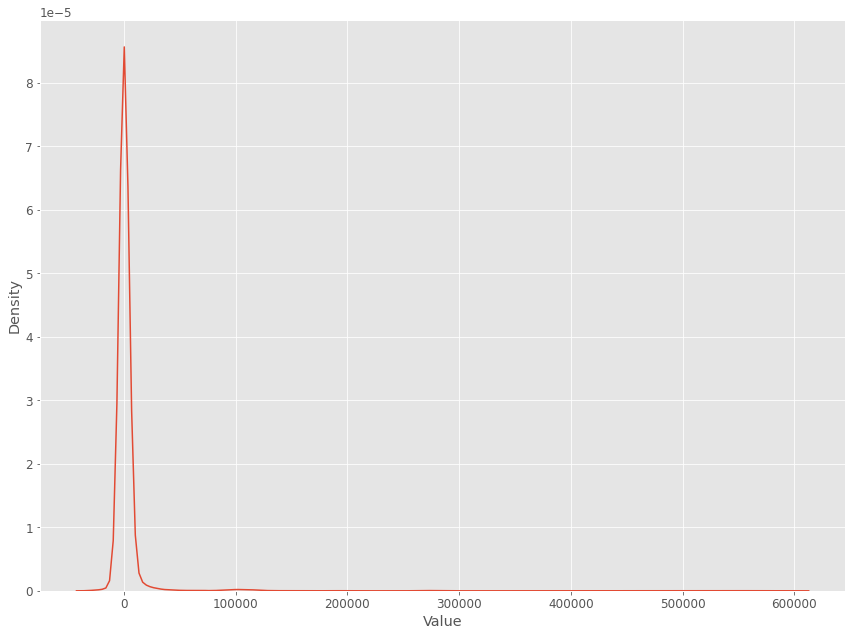

In [18]:
sns.kdeplot(data=df1, x='Value')

# Missing Data Exploration

In [19]:
df1.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
Series                 0
Value                  0
dtype: int64

# Grouping and Aggregation

In [20]:
df1_gpd = df1.groupby('Region/Country/Area')
df1_gpd.head()

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",1995,Primary energy production (petajoules),382594
1,1,"Total, all countries or areas",2000,Primary energy production (petajoules),413334
2,1,"Total, all countries or areas",2005,Primary energy production (petajoules),477637
3,1,"Total, all countries or areas",2010,Primary energy production (petajoules),531540
4,1,"Total, all countries or areas",2015,Primary energy production (petajoules),570407
...,...,...,...,...,...
8371,716,Zimbabwe,1995,Primary energy production (petajoules),362
8372,716,Zimbabwe,2000,Primary energy production (petajoules),379
8373,716,Zimbabwe,2005,Primary energy production (petajoules),379
8374,716,Zimbabwe,2010,Primary energy production (petajoules),369


# Data Visualization

Helper function to visualize individual Regions, Countries or Areas

In [21]:
# helper function to plot bar charts
def plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None):
    # initiate matplot figure
    fig, ax = plt.subplots(figsize=(15, 12))
    fig.autofmt_xdate()

    # plot bar chart
    sns.barplot(
        x=x, y=y,
        hue=hue, ci=None,
        data=df)

    # label plot axis
    ax.set(title=main_title, xlabel=xlabel, ylabel=ylabel)

    # plot legend
    plt.legend(title=leg_title, loc=loc, labels=leg_labels)

    return plot_bar

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

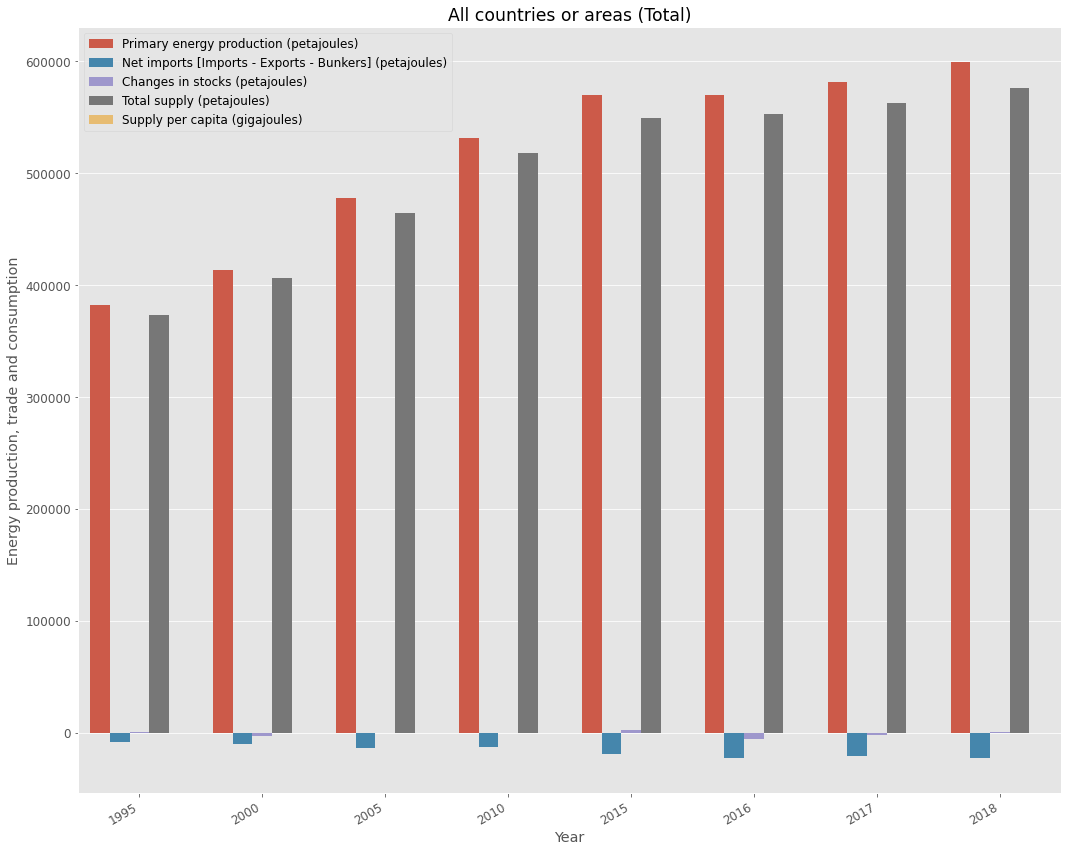

In [22]:
plot_bar(
    x='Year', y='Value', hue='Series',
    df=df1_gpd.get_group('Total, all countries or areas'),
    main_title='All countries or areas (Total)', xlabel='Year', ylabel='Energy production, trade and consumption', 
)

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

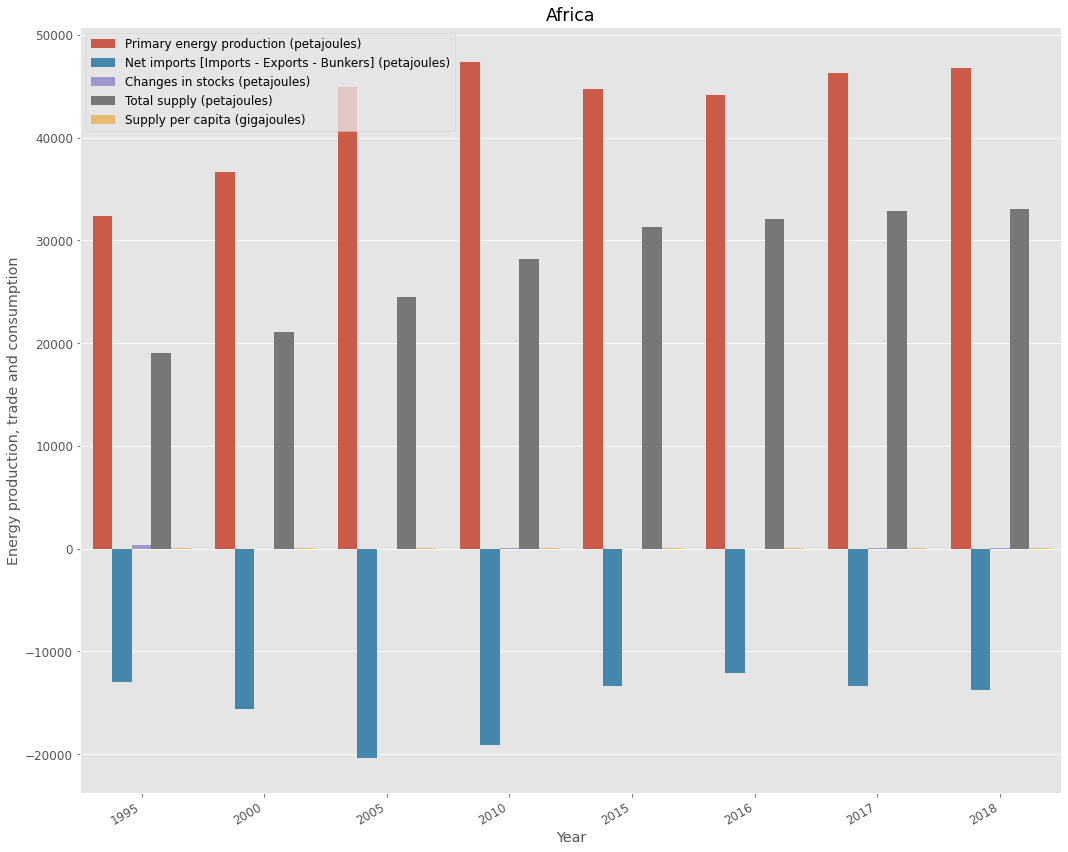

In [23]:
plot_bar(
    x='Year', y='Value', hue='Series',
    df=df1_gpd.get_group('Africa'),
    main_title='Africa', xlabel='Year', ylabel='Energy production, trade and consumption', 
)

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

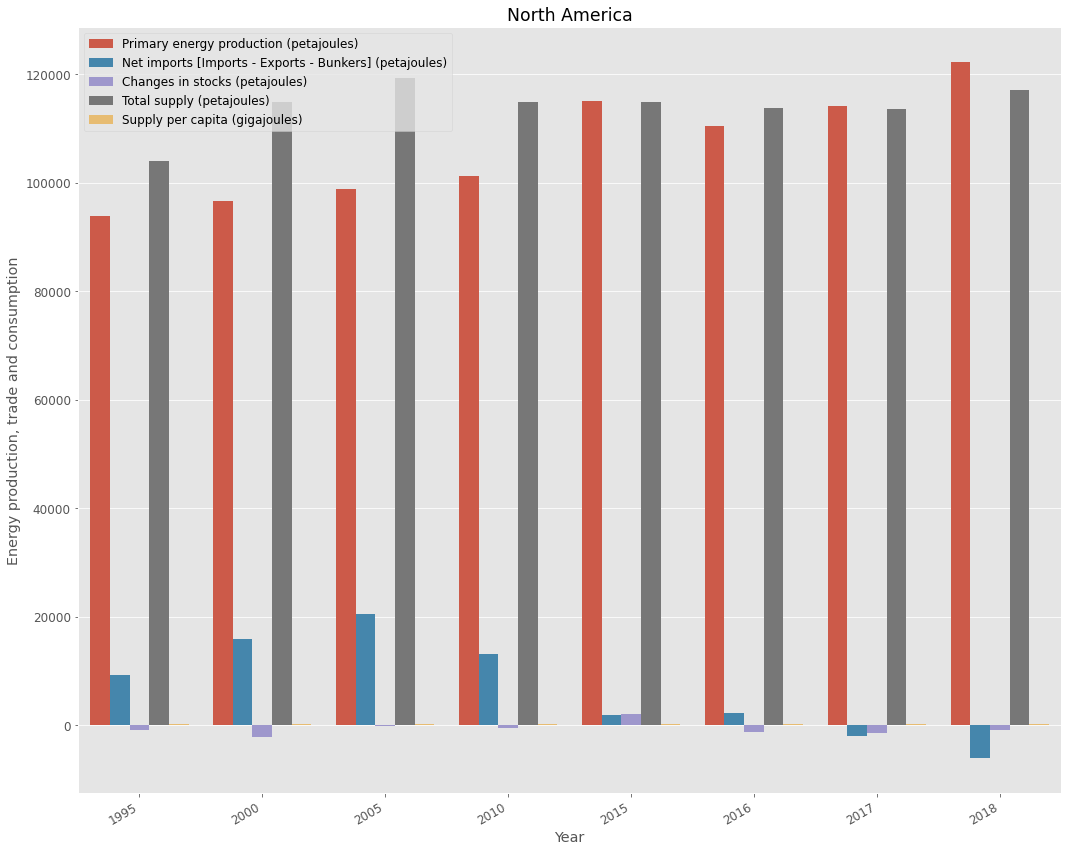

In [24]:
plot_bar(
    x='Year', y='Value', hue='Series',
    df=df1_gpd.get_group('North America'),
    main_title='North America', xlabel='Year', ylabel='Energy production, trade and consumption', 
)

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

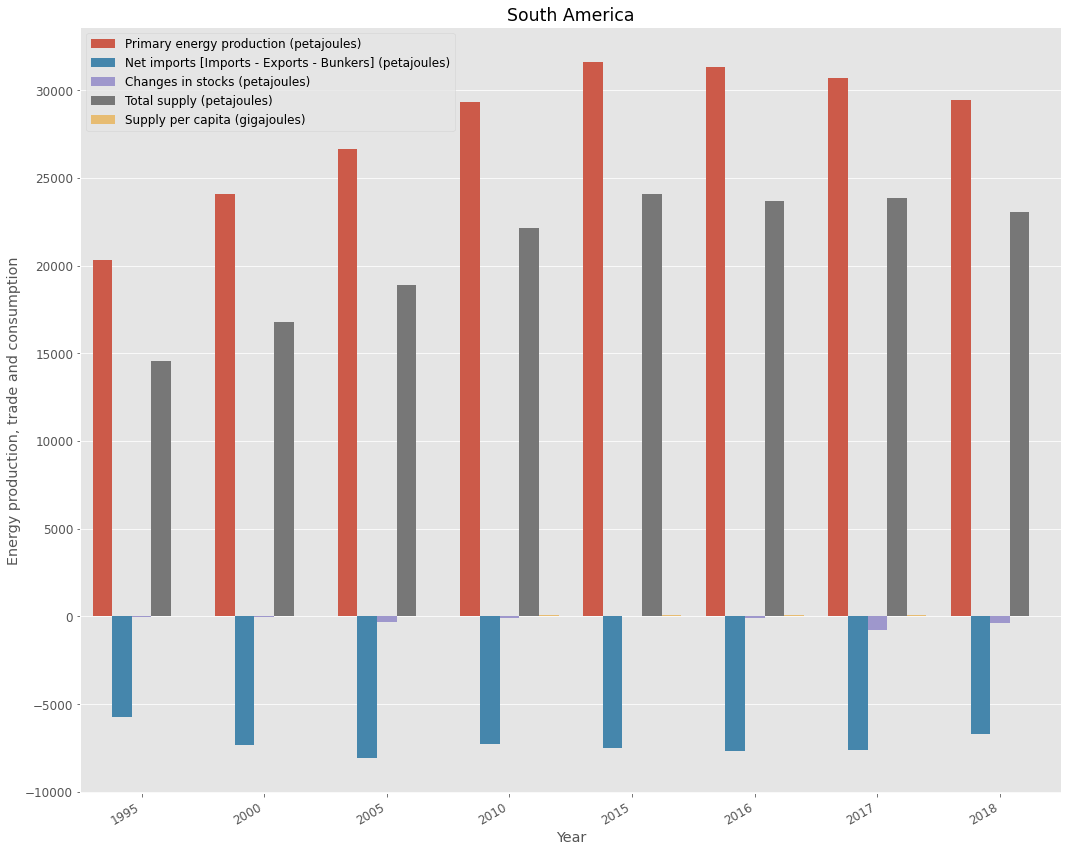

In [25]:
plot_bar(
    x='Year', y='Value', hue='Series',
    df=df1_gpd.get_group('South America'),
    main_title='South America', xlabel='Year', ylabel='Energy production, trade and consumption', 
)

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

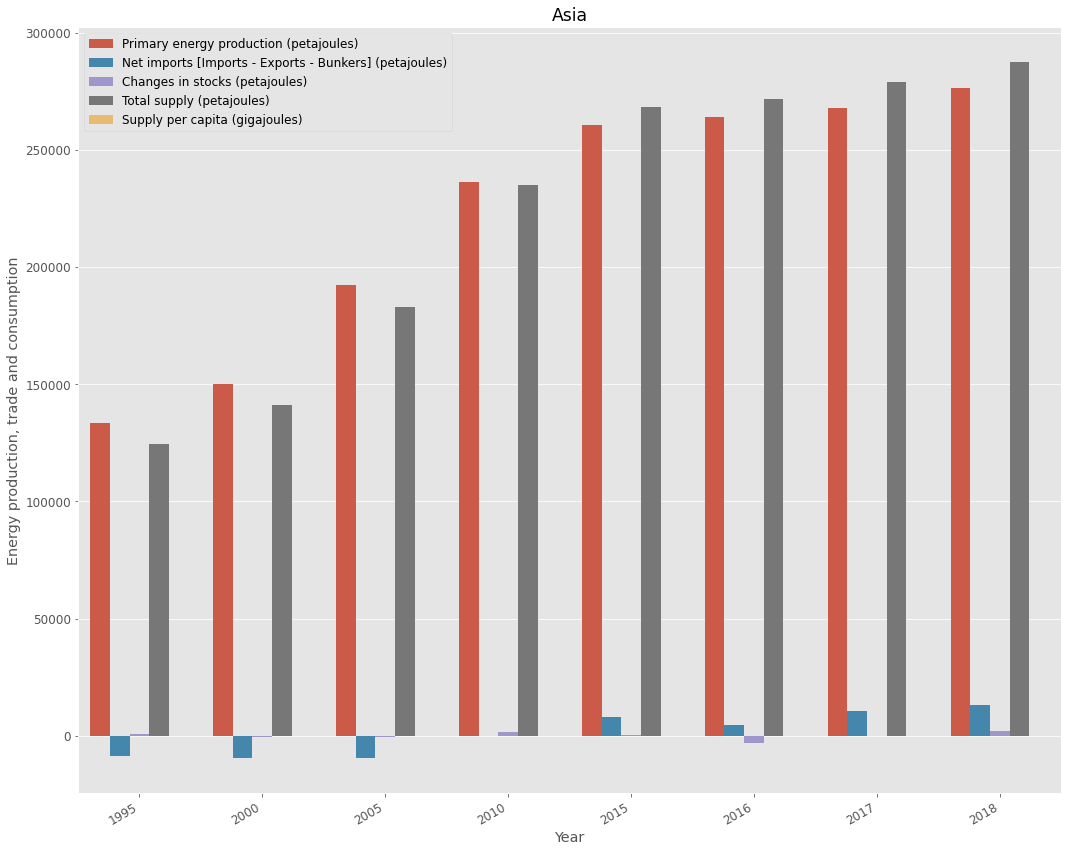

In [26]:
plot_bar(
    x='Year', y='Value', hue='Series',
    df=df1_gpd.get_group('Asia'),
    main_title='Asia', xlabel='Year', ylabel='Energy production, trade and consumption', 
)

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

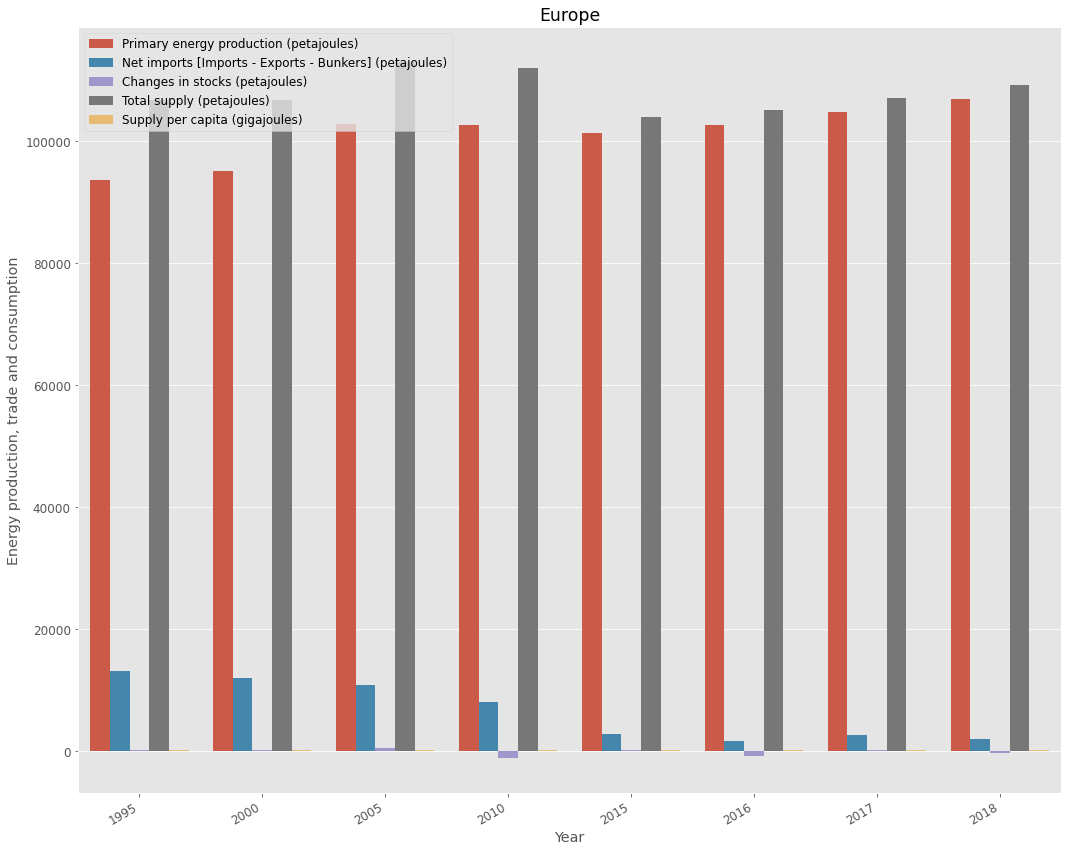

In [27]:
plot_bar(
    x='Year', y='Value', hue='Series',
    df=df1_gpd.get_group('Europe'),
    main_title='Europe', xlabel='Year', ylabel='Energy production, trade and consumption', 
)

<function __main__.plot_bar(x, y, hue, df, main_title=None, xlabel=None, ylabel=None, leg_title=None, loc=None, leg_labels=None)>

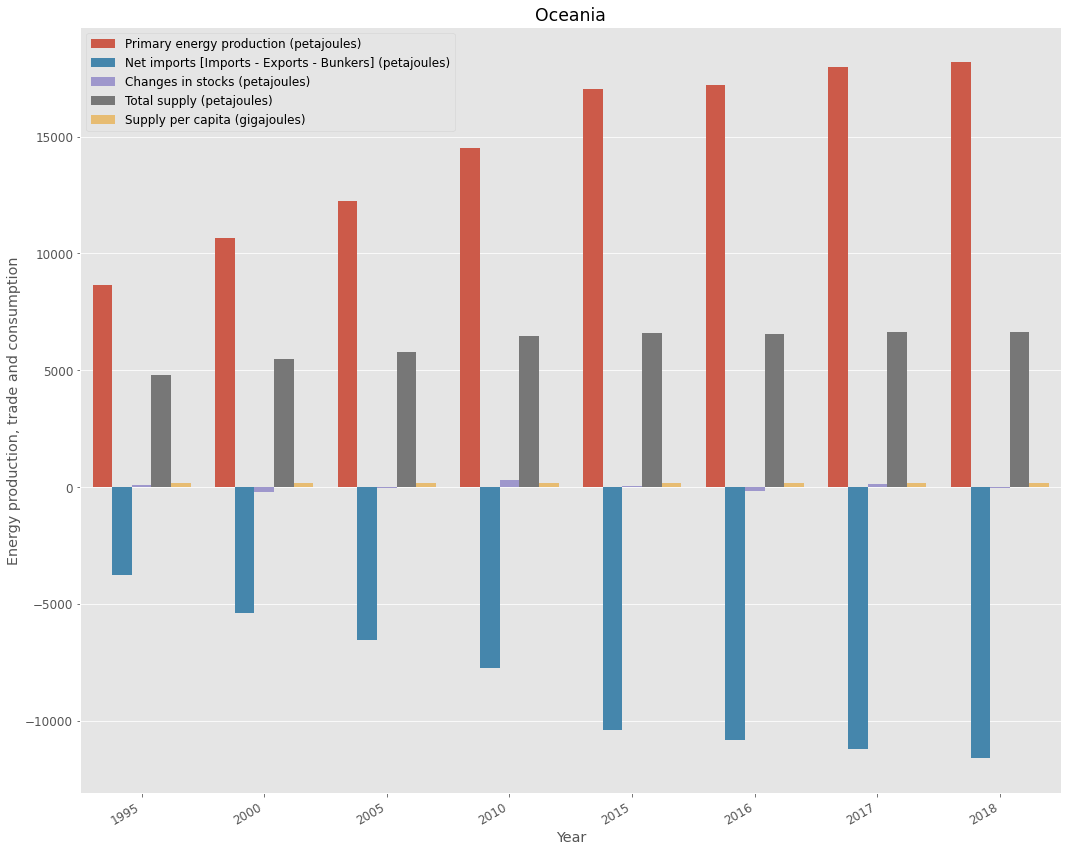

In [28]:
plot_bar(
    x='Year', y='Value', hue='Series',
    df=df1_gpd.get_group('Oceania'),
    main_title='Oceania', xlabel='Year', ylabel='Energy production, trade and consumption', 
)